In [203]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [205]:
df = pd.read_csv('final_data.csv')

In [207]:
df.drop(columns = ['job_title', 'min_salary', 'max_salary'], inplace = True)

In [209]:
df.rename(columns = {'age':'age_of_company'}, inplace = True)

In [211]:
df.head()

,company_name,location,job_description,rating,employer_estimate,avg_salary,Size,Founded,Type,Industry,Sector,Revenue,skills,age_of_company,seniority,job_simp
0,Procter & Gamble,Mumbai,The Senior Manager’s role will ensure that the...,4.1,0,550000.0,10000+ Employees,1837,Company - Public,Consumer Product Manufacturing,Manufacturing,$10+ billion (USD),"SAP, SOX, Analysis skills, SAP S/4HANA, RMF",187.0,2.0,manager
1,S&P Global,Gurgaon,We are responsible for assuring that data impa...,4.1,0,600000.0,10000+ Employees,1860,Company - Public,Research and development,Management and consulting,$10+ billion (USD),"Business intelligence, Relational databases, ...",164.0,0.0,analyst
2,Oracuz Infotech Pvt Ltd,Remote,You will be assigned with module projects and ...,NaN,1,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Web development, Machine learning, Data science",NaN,0.0,data scientist
3,Optum,Bengaluru,"As an Associate Manager, you will play a criti...",NaN,0,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN,"TensorFlow, Big data, SQL, Analysis skills, M...",NaN,2.0,manager data scientist
4,ITI Data,Chennai,Require Financial Services industry experience...,4.2,0,550000.0,201 to 500 Employees,1999,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,"Oracle, XML, Spark, NoSQL, MongoDB",25.0,1.0,data engineer


In [213]:
df.shape

(374, 16)

In [7]:
df.isnull().sum()

company_name           0
location               0
job_description        0
rating                53
employer_estimate      0
avg_salary             0
Size                  51
Founded               51
Type                  51
Industry              51
Sector                51
Revenue               51
skills                 1
age_of_company       106
seniority              0
job_simp               0
dtype: int64

In [8]:
df['Founded']

0      1837
1      1860
2       NaN
3       NaN
4      1999
       ... 
369    2009
370      --
371     NaN
372    2015
373     NaN
Name: Founded, Length: 374, dtype: object

In [9]:
df.shape

(374, 16)

In [10]:
# there were so many null values in age column so we did this 
df['age_of_company'].fillna(df['age_of_company'].mean(), inplace = True) 

C:\Users\urvas\AppData\Local\Temp\ipykernel_25588\475783984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_of_company'].fillna(df['age_of_company'].mean(), inplace = True)


###### Looking into founded column

In [12]:
df['Founded'][0]

'1837'

In [13]:
df['Founded'] = df['Founded'].apply(lambda x : int(x.strip()) if pd.notnull(x) and x.strip()!= '--' else None)

In [14]:
# for rest of the columns we dropped the null values
df = df.dropna().reset_index(drop = 'First')

In [15]:
df['Founded'] = df['Founded'].astype(int)

In [16]:
df.shape

(268, 16)

###### Dealing with size column

In [18]:
size = []
for i in df['Size']:
    size.append( i.split()[:-1])

In [19]:
size[:5]

[['10000+'], ['10000+'], ['201', 'to', '500'], ['10000+'], ['10000+']]

In [20]:
len(size[10])

1

In [21]:
int(size[0][0][:-1])

10000

In [22]:
right = []
for i in range(len(size)):
    word = size[i]
    if(len(word) != 0):
        word = word[-1]
        if(word[-1] == '+'):
            right.append(int(word[:-1]))
        else:
            right.append(int(word))
    else:
        right.append(0)
        

In [23]:
left = []
for i in range(len(size)):
    word = size[i]
    if(len(word) != 0):
        word = word[0]
        if(word[-1] == '+'):
            left.append(int(word[:-1]))
        else:
            left.append(int(word))
    else:
        left.append(0)
        

In [24]:
df['Size'][:10]

0        10000+ Employees
1        10000+ Employees
2    201 to 500 Employees
3        10000+ Employees
4        10000+ Employees
5       1 to 50 Employees
6        10000+ Employees
7        10000+ Employees
8        10000+ Employees
9        10000+ Employees
Name: Size, dtype: object

In [25]:
# dealing with the size column
df['avg_size'] = [i+j/2 for i,j in zip(left, right)]

In [26]:
df['avg_size']

0      15000.0
1      15000.0
2        451.0
3      15000.0
4      15000.0
        ...   
263     3501.0
264    15000.0
265    15000.0
266     3501.0
267       26.0
Name: avg_size, Length: 268, dtype: float64

##### note that on revenue as well we can apply similar preprocessing as the size of company column
but for numerical encoding because of presence of 2 separate billion and million as units we might need to connvert it to having 10^6 0s for million and so. (this could add an additional step of scaling the column as well , later)

Advantages:

This preserves the actual scale and monetary differences between categories.
No need for encoding; the column remains numeric, which many models handle better.
Disadvantages:

"Unknown / Non-Applicable" doesn’t have a natural numeric value, so handling it may introduce bias.

Let's see going with ordinal encoding

In [28]:
df['Revenue'].value_counts(normalize = True)*100

Revenue
$10+ billion (USD)                  31.343284
$5 to $10 billion (USD)             30.970149
Unknown / Non-Applicable            20.895522
$2 to $5 billion (USD)              10.447761
$5 to $25 million (USD)              2.238806
$100 to $500 million (USD)           2.238806
$500 million to $1 billion (USD)     0.746269
$1 to $5 million (USD)               0.746269
Less than $1 million (USD)           0.373134
Name: proportion, dtype: float64

In [29]:
# Create a dictionary for ordinal encoding
ordinal_mapping = {
    '$10+ billion (USD)': 9,
    '$5 to $10 billion (USD)': 8,
    '$2 to $5 billion (USD)': 7,
    '$500 million to $1 billion (USD)': 6,
    '$100 to $500 million (USD)': 5,
    '$5 to $25 million (USD)': 4,
    '$1 to $5 million (USD)': 3,
    'Less than $1 million (USD)': 2,
    'Unknown / Non-Applicable': 1  # Handle appropriately
}

# Map the column to ordinal values
df['Revenue'] = df['Revenue'].map(ordinal_mapping)


In [30]:
df['Revenue']

0      9
1      9
2      1
3      7
4      9
      ..
263    1
264    8
265    9
266    7
267    1
Name: Revenue, Length: 268, dtype: int64

##### Handling description column

In [32]:
# first dealing with the description col - take len of desc and remove text col
# 2nd skill column can be encoded - using ohe

In [33]:
df['len_description'] = df['job_description'].apply(len)

In [34]:
df.drop(columns = ['Size', 'job_description'], inplace = True)

In [35]:
df.shape

(268, 16)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       268 non-null    object 
 1   location           268 non-null    object 
 2   rating             268 non-null    float64
 3   employer_estimate  268 non-null    int64  
 4   avg_salary         268 non-null    float64
 5   Founded            268 non-null    int32  
 6   Type               268 non-null    object 
 7   Industry           268 non-null    object 
 8   Sector             268 non-null    object 
 9   Revenue            268 non-null    int64  
 10  skills             268 non-null    object 
 11  age_of_company     268 non-null    float64
 12  seniority          268 non-null    float64
 13  job_simp           268 non-null    object 
 14  avg_size           268 non-null    float64
 15  len_description    268 non-null    int64  
dtypes: float64(5), int32(1), i

##### Other categorical columns

##### Industry column preprocessing

In [39]:
df.select_dtypes('object').columns

Index(['company_name', 'location', 'Type', 'Industry', 'Sector', 'skills',
       'job_simp'],
      dtype='object')

In [40]:
print("No of unique classes = ")
for col in df.select_dtypes('object').columns :
    print(col, df[col].nunique())

No of unique classes = 
company_name 65
location 16
Type 3
Industry 23
Sector 13
skills 139
job_simp 16


In [41]:
# so many categories but many with small counts, so we can convert many small ones to `other` category
df['Industry'].value_counts()

Industry
Business consulting                        84
Information Technology Support Services    34
Biotech & Pharmaceuticals                  17
Banking & Lending                          16
Research and development                   14
Aerospace and defence                      13
Financial Transaction Processing           12
Computer Hardware Development              11
Enterprise Software & Network Solutions    10
Software Development                        8
Energy & Utilities                          7
Internet & Web Services                     6
Gambling & Betting                          5
Consumer Product Manufacturing              5
Machinery Manufacturing                     4
Travel Agencies                             4
Telecommunications Services                 4
HR Consulting                               4
Investment & Asset Management               4
Publishing                                  2
Electronics Manufacturing                   2
Advertising & Public Rela

`About the warnings in below cell`

- If you're working with a standalone DataFrame (df was not created as a slice), your code might work as expected even with the warning.
- However, if df is a slice (e.g., created using filtering like df = original_df[condition]), the changes might not persist in the original DataFrame.

use `iloc` to prevent it from happening

In [43]:
industry = dict(df['Industry'].value_counts())
for i in range(len(df.Industry)):
    if (industry[df['Industry'][i]] <10):
        df.loc[i, 'Industry'] = 'other'

In [44]:
len(industry)

23

In [45]:
len(df.Industry)

268

In [46]:
df['Industry'].value_counts() # now we will one hot encode them

Industry
Business consulting                        84
other                                      57
Information Technology Support Services    34
Biotech & Pharmaceuticals                  17
Banking & Lending                          16
Research and development                   14
Aerospace and defence                      13
Financial Transaction Processing           12
Computer Hardware Development              11
Enterprise Software & Network Solutions    10
Name: count, dtype: int64

In [47]:
industries_dummy = pd.get_dummies(df['Industry'], drop_first = True, dtype = 'int')

In [48]:
industries_dummy

,Banking & Lending,Biotech & Pharmaceuticals,Business consulting,Computer Hardware Development,Enterprise Software & Network Solutions,Financial Transaction Processing,Information Technology Support Services,Research and development,other
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
263,0,0,1,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,1
265,0,0,0,0,0,0,0,0,1
266,0,0,0,0,0,0,0,0,1


##### Ohe for type and sector as well 

In [50]:
df.Type.value_counts()

Type
Company - Public                  133
Company - Private                 131
Subsidiary or Business Segment      4
Name: count, dtype: int64

In [51]:
type_dummy = pd.get_dummies(df['Type'], drop_first = True, dtype = 'int')

##### Sector column preprocessing

In [53]:
df.Sector[0]

'Manufacturing'

In [54]:
sector = dict(df['Sector'].value_counts())
for i in range(len(df.Sector)):
    if (sector[df['Sector'][i]] <10):
        df.loc[i, 'Sector'] = 'other'

In [55]:
df.Sector.value_counts()

Sector
Management and consulting           98
Information Technology              69
Finance                             32
other                               28
Pharmaceutical and biotechnology    17
Aerospace and defence               13
Manufacturing                       11
Name: count, dtype: int64

In [56]:
# checking the relation between industry and sector
# we see a many to one relationship and no overlapping of industries with multiple sectors 
# this shows that the information in both the columns is redundant
pd.crosstab(df['Industry'], df['Sector'])

Sector,Aerospace and defence,Finance,Information Technology,Management and consulting,Manufacturing,Pharmaceutical and biotechnology,other
Industry,,,,,,,
Aerospace and defence,13,0,0,0,0,0,0
Banking & Lending,0,16,0,0,0,0,0
Biotech & Pharmaceuticals,0,0,0,0,0,17,0
Business consulting,0,0,0,84,0,0,0
Computer Hardware Development,0,0,11,0,0,0,0
Enterprise Software & Network Solutions,0,0,10,0,0,0,0
Financial Transaction Processing,0,12,0,0,0,0,0
Information Technology Support Services,0,0,34,0,0,0,0
Research and development,0,0,0,14,0,0,0


In [57]:
df.groupby('Industry')['avg_salary'].mean()

Industry
Aerospace and defence                      207691.615385
Banking & Lending                          409374.562500
Biotech & Pharmaceuticals                  152940.411765
Business consulting                        279356.642857
Computer Hardware Development              595454.090909
Enterprise Software & Network Solutions    334999.500000
Financial Transaction Processing           316041.166667
Information Technology Support Services    305587.764706
Research and development                   243963.785714
other                                      217937.982456
Name: avg_salary, dtype: float64

In [58]:
# target encoding industry and sector to check their correlation with target col
# to decide which one to drop
industry_mean = df.groupby('Industry')['avg_salary'].mean()
df['industry_target_encoded'] = df['Industry'].map(industry_mean)

In [59]:
sector_mean = df.groupby('Sector')['avg_salary'].mean()
df['sector_target_encoded'] = df['Sector'].map(sector_mean)

If the correlation is significant (e.g., > 0.3 or < -0.3), target encoding is likely a good choice.

but here it is not

In [61]:
df.select_dtypes('number').corr()['avg_salary']

rating                     0.064344
employer_estimate          0.165368
avg_salary                 1.000000
Founded                   -0.021174
Revenue                   -0.064586
age_of_company             0.021174
seniority                 -0.053743
avg_size                  -0.050925
len_description            0.008129
industry_target_encoded    0.222054
sector_target_encoded      0.193514
Name: avg_salary, dtype: float64

In [62]:
# so we keep industry column after encoding and remove sector 
# since they are quite redundant

In [63]:
# note that since we now have OHE industry values so we can remvoe original column
df.drop(columns = ['Industry', 'Sector', 'industry_target_encoded', 'sector_target_encoded'], inplace = True)

In [64]:
print("No of unique classes = ")
for col in df.select_dtypes('object').columns :
    print(col, df[col].nunique())

No of unique classes = 
company_name 65
location 16
Type 3
skills 139
job_simp 16


- if different categories have distinct distributions of the target variable.
- If the mean salary varies significantly across categories, the column might be correlated with avg_salary.

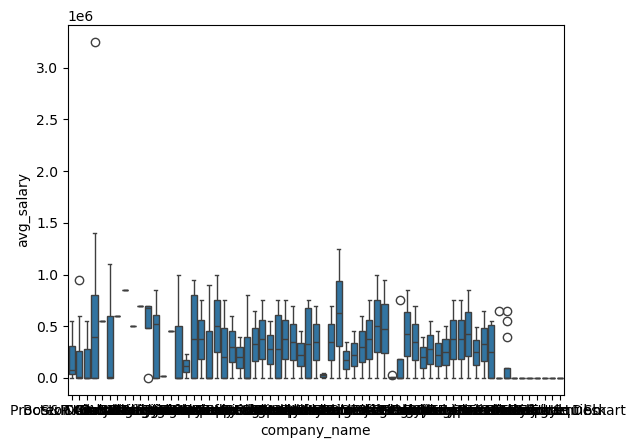

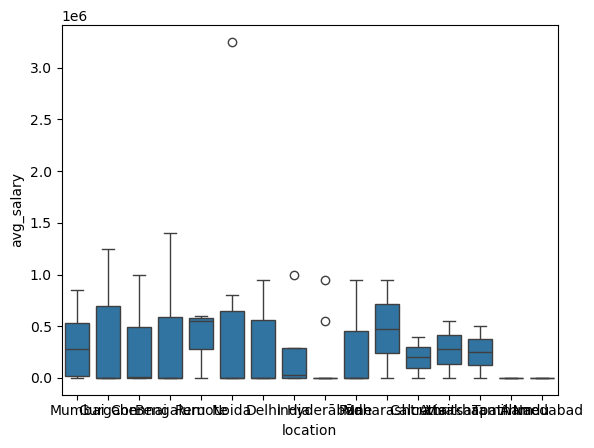

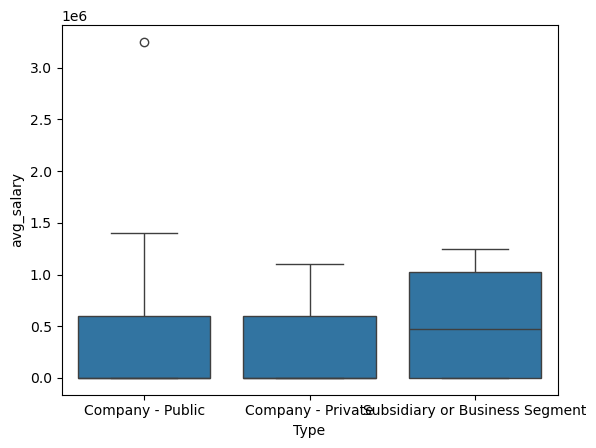

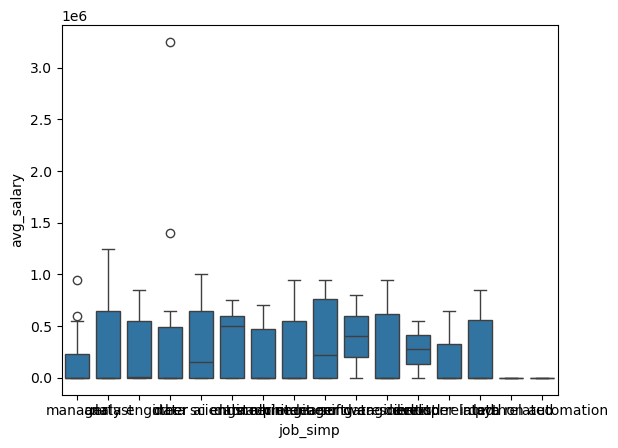

In [66]:
for col in df.select_dtypes('object').columns :
    if(col == 'skills'):
        continue
    plt.figure()
    sns.boxplot(data = df, x = col, y = 'avg_salary')

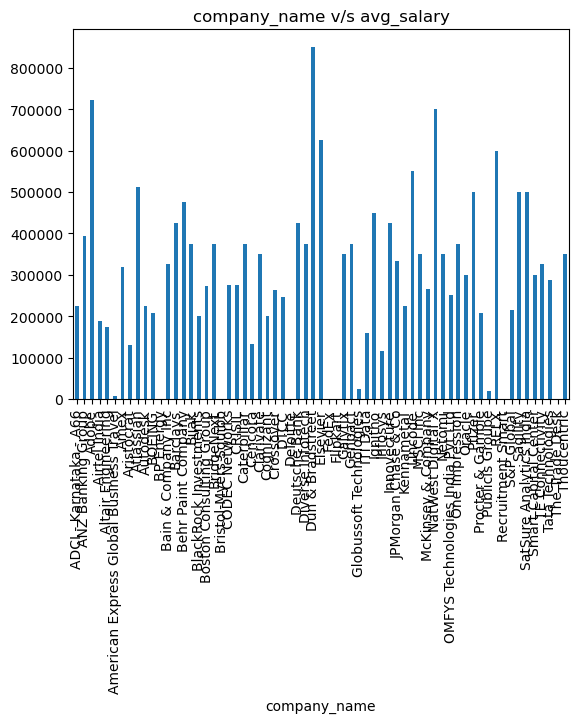

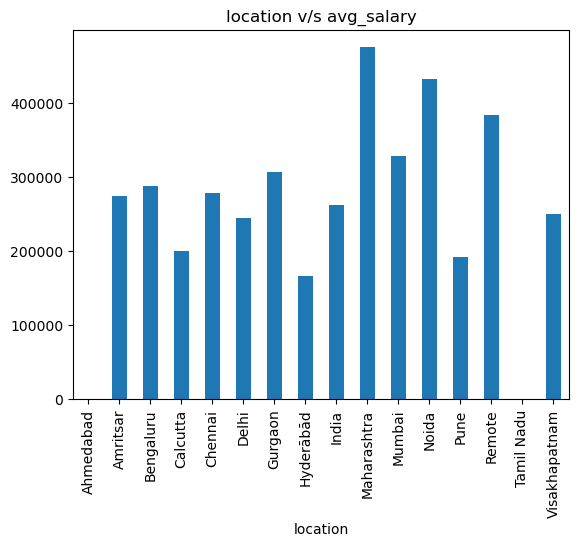

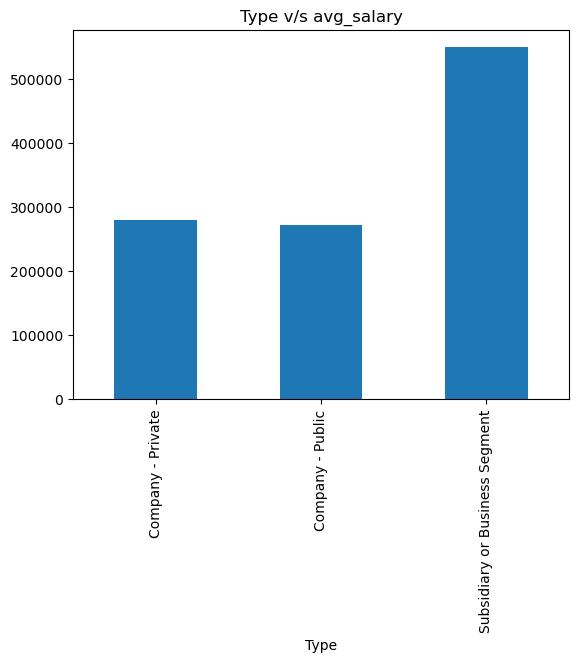

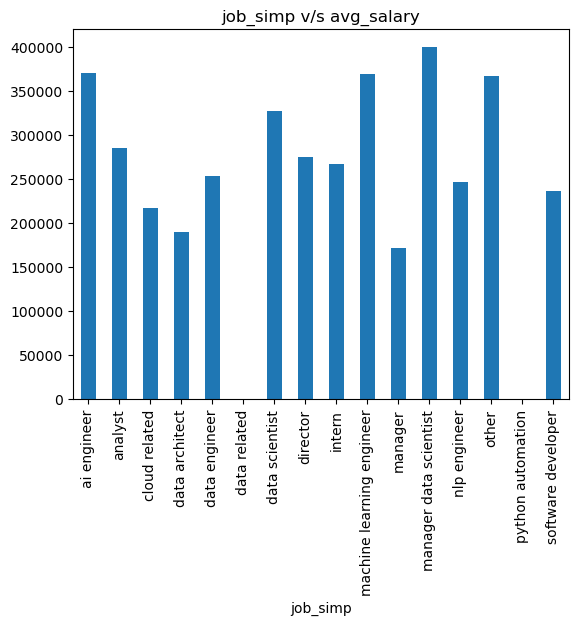

In [67]:
for col in df.select_dtypes('object').columns :
    if(col == 'skills'):
        continue
    plt.figure()
    plt.title(f'{col} v/s avg_salary')
    df.groupby(col)['avg_salary'].mean().plot(kind = 'bar')

Statistical methods can measure the strength of the relationship between a categorical column and a numerical target:

- what we saw in bar graphs above , if that difference in mean of salary is significant accross categories can be checked using statistical tests like ANOVA
- If the p-value is below 0.05, the categorical column is likely correlated with the target variable.

In [69]:
df['job_simp'].unique()

array(['manager', 'analyst', 'data engineer', 'other', 'data scientist',
       'ai engineer', 'data architect', 'nlp engineer',
       'machine learning engineer', 'manager data scientist',
       'software developer', 'director', 'cloud related', 'intern',
       'data related', 'python automation'], dtype=object)

In [70]:
from scipy.stats import f_oneway

for col in df.select_dtypes('object').columns :
    if(col == 'skills'):
        continue
    groups = [df[df[col] == category]['avg_salary'] for category in df[col].unique()]
    print(col)
    f_stat, p_value = f_oneway(*groups)
    print("pvalue :", p_value, col)

company_name
pvalue : 0.9960511006202075 company_name
location
pvalue : 0.9489434727870096 location
Type
pvalue : 0.3785355209926933 Type
job_simp
pvalue : 0.9773484382372789 job_simp


- p values are not significant - so target encoding should not be used 
- Avoid Target Encoding If:

- The column has high cardinality and the dataset is small (it may cause overfitting).
- The column has no significant correlation with the target (e.g., p-value > 0.05).

##### Encoding location and job title

In [73]:
location = dict(df['location'].value_counts())
for i in range(len(df.location)):
    if (location[df['location'][i]] <5):
        df.loc[i, 'location'] = 'other'

In [74]:
df['location'].value_counts()

location
Bengaluru    86
Gurgaon      61
Delhi        32
Pune         31
other        17
Noida        17
Chennai       9
Hyderābād     9
Mumbai        6
Name: count, dtype: int64

In [75]:
location_encoded = pd.get_dummies(df['location'], dtype = 'int',drop_first=True)

In [76]:
jobs_encoded = pd.get_dummies(df['job_simp'], dtype = 'int', drop_first = True)

## Next steps : 
- look for correlation between sector and industry (for this u will have to bring industry back since u removed it)
- then think of encoding sector if needed or drop one of them
- then pick the bow steps from previous notebook for skills column (preprocessing it before bow)
- also perform chatgpt suggested steps to understand when to apply target encoding by understanding correlation between target and that cat col

##### Note that for skills column the best encoding technique could be bag of words  because we will take into account the frequency of each of the unique skills in eacch of the rows i.e. for each of the job profiles.

In [79]:
df['skills'] # we want the space sparated skills to be taken as a single token like data science, machine learning etc ..

0            SAP, SOX, Analysis skills, SAP S/4HANA, RMF
1       Business intelligence, Relational databases, ...
2                     Oracle, XML, Spark, NoSQL, MongoDB
3       TensorFlow, Image processing, Azure, Kubernet...
4       SQL, Analysis skills, Data science, Data visu...
                             ...                        
263     Analysis skills, Market research, Communicati...
264                                         Data science
265     TensorFlow, Statistics, Big data, Software de...
266                Machine learning, Distributed systems
267                                         Data science
Name: skills, Length: 268, dtype: object

In [80]:
df['skills'] = df['skills'].apply(str.lower)
df['skills'] = df['skills'].apply(str.strip)
#df['skills'] = df['skills'].apply(str.split, sep = ',')

In [81]:
df['skills'].value_counts()

skills
microsoft powerpoint, statistics, power bi, microsoft access, azure    8
data science                                                           6
ci/cd, cloud infrastructure, azure, node.js, react                     6
microsoft powerpoint, supply chain, spark, alteryx, analysis skills    5
azure, cloud architecture, pci, kubernetes, big data                   5
                                                                      ..
jira, authentication, asp.net, safe, cloud infrastructure              1
asset management, safe, supply chain, product management, uml          1
ci/cd, azure, kubernetes, java, terraform                              1
ci/cd, azure, test automation, selenium, git                           1
machine learning, distributed systems                                  1
Name: count, Length: 139, dtype: int64

- skill column k sbhi sentences ko sort kro
- unme se ',' k baad jo words h unko join kro jinke beech spaces h
- 

In [83]:
type(df['skills'][i])

str

In [84]:
for i in range(len(df['skills'])):
        print(df['skills'][i])

sap, sox, analysis skills, sap s/4hana, rmf
business intelligence, relational databases, tableau, databases, sql
oracle, xml, spark, nosql, mongodb
tensorflow, image processing, azure, kubernetes, computer vision
sql, analysis skills, data science, data visualization, communication skills
tensorflow, image processing, azure, computer vision, google cloud platform
azure, big data, spark, r, java
image processing, azure, big data, r, google cloud platform
research, analysis skills, data science, communication skills
azure, cloud architecture, pci, kubernetes, big data
microsoft powerpoint, ci/cd, azure, cassandra, kubernetes
azure, data structures, adobe creative suite, application development, aws
microsoft powerpoint, computer science, power bi, microsoft excel, big data
image processing, r, english, sql, machine learning
microsoft powerpoint, supply chain, spark, alteryx, analysis skills
microsoft powerpoint, statistics, power bi, microsoft access, azure
software deployment, informati

In [85]:
st = 'tensorflow, image processing, azure, computer vision, google cloud platform'
lst = st.split(',')
lst = [s.strip() for s in lst]
ans = []
for i in lst:
    print(i)
    s = ''
    for j in i.split():
        s = s + j 
        #s = s[:-1]
    ans.append(s)
' '.join(ans)

tensorflow
image processing
azure
computer vision
google cloud platform


'tensorflow imageprocessing azure computervision googlecloudplatform'

In [86]:
# using custom tokenizer in count vectorizer
# This way, terms like data science remain intact without manual preprocessing.

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda x : x.split(', '))
bow = vec.fit_transform(df['skills'])
vec.get_feature_names_out().shape

D:\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(166,)

In [87]:
vec.get_feature_names_out()

array(['.net', 'adobe creative suite', 'agile', 'ai', 'alteryx',
       'analysis skills', 'analytics', 'android', 'angular',
       'apache hive', 'apis', 'application development', 'arcgis',
       'asp.net', 'asset management', 'authentication', 'aws', 'azure',
       'big data', 'bloomberg', 'bootstrap', 'business analysis',
       'business intelligence', 'business requirements', 'c#',
       'cassandra', 'ci/cd', 'cloud architecture', 'cloud infrastructure',
       'communication skills', 'computer science', 'computer vision',
       'css', 'cucumber', 'customer service', 'cybersecurity',
       'data analysis skills', 'data entry', 'data management',
       'data mining', 'data modeling', 'data science', 'data structures',
       'data visualization', 'database development', 'databases',
       'deep learning', 'design patterns', 'devops',
       'distributed systems', 'django', 'docker', 'drupal',
       'elasticsearch', 'electrical experience', 'encryption', 'english',
       

In [88]:
bow_df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
bow_df

,.net,adobe creative suite,agile,ai,alteryx,analysis skills,analytics,android,angular,apache hive,...,tcp,tensorflow,terraform,test automation,test-driven development,uml,vendor management,visual basic,web development,xml
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# it's a sparse matrix
arr = bow.toarray()
for i in arr:
    print(i)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0

##### note that below preprocessing was required if we did not provide custom tokenizer in the countvectorizer, and we saw that custom tokenizer is performing better(by reducing vocabulary size) compared to our custom preprocessing

In [91]:
# def reduce_to_tokens(sentence):
#     lst = sentence.split(',')
#     lst = [s.strip() for s in lst]
#     ans = []
#     for i in lst:
#         #print(i)
#         s = ''
#         for j in i.split():
#             s = s + j 
#             #s = s[:-1]
#         ans.append(s)
#     return ' '.join(ans)

In [92]:
# df['skills'] = df['skills'].apply(reduce_to_tokens)

In [93]:
# df['skills'].value_counts()

In [94]:
# # applying bag of words
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer1 = CountVectorizer()
# bow = vectorizer1.fit_transform(df['skills'])
# bow.toarray()

In [95]:
# vectorizer1.get_feature_names_out().shape

In [96]:
# vectorizer1.get_feature_names_out()

In [97]:
# cnt = 0
# s = ''
# for i in df['skills'][0].split(','):
#     if(cnt % 2 == 0):
#         s += i
#         print(s)
#     else:
#         s = s+' '+i
#         print(s)
#     print(cnt)
#     cnt += 1

In [98]:
# def combine_names(obj):
#     cnt=0
#     s = ''
#     for i in obj.split():
#         if cnt%2==0:
#             s+=i
#             cnt += 1
#         else:
#             s = s+ ' ' + i
#             cnt+=1
#     return s.strip()

In [99]:
# def remove_punctuation(text):
#     import string
#     withoutpunc = [x for x in text if x not in string.punctuation]
#     return ''.join(withoutpunc)

In [100]:
df.head()

,company_name,location,rating,employer_estimate,avg_salary,Founded,Type,Revenue,skills,age_of_company,seniority,job_simp,avg_size,len_description
0,Procter & Gamble,Mumbai,4.1,0,550000.0,1837,Company - Public,9,"sap, sox, analysis skills, sap s/4hana, rmf",187.0,2.0,manager,15000.0,208
1,S&P Global,Gurgaon,4.1,0,600000.0,1860,Company - Public,9,"business intelligence, relational databases, t...",164.0,0.0,analyst,15000.0,231
2,ITI Data,Chennai,4.2,0,550000.0,1999,Company - Private,1,"oracle, xml, spark, nosql, mongodb",25.0,1.0,data engineer,451.0,204
3,Adobe,Bengaluru,4.2,1,1400000.0,1982,Company - Public,7,"tensorflow, image processing, azure, kubernete...",42.0,2.0,other,15000.0,196
4,S&P Global,Bengaluru,4.1,1,17500.0,1860,Company - Public,9,"sql, analysis skills, data science, data visua...",164.0,0.0,data scientist,15000.0,227


In [101]:
df.groupby('company_name')['avg_salary'].mean().reset_index()

,company_name,avg_salary
0,ADCI - Karnataka - A66,224999.500000
1,ANZ Banking Group,393749.625000
2,Adobe,722221.777778
3,Airtel India,187499.250000
4,Altair Engineering,174999.500000
...,...,...
60,Smart Capital Center,299999.500000
61,TE Connectivity,324999.500000
62,Tata Technologies,287499.500000
63,The Trade Desk,-1.000000


In [102]:
# Below ANOVA test shows that company name is not related to target column so target encoding can be avoided

# Data Preparation
groups = [group['avg_salary'].values for name, group in df.groupby('company_name')]

# ANOVA Test
f_statistic, p_value = stats.f_oneway(*groups)

# Results
print(f'F-statistic: {f_statistic}, p-value: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences among group means.")
else:
    print("Fail to reject the null hypothesis: No significant differences among group means.")

F-statistic: 0.5617418051178142, p-value: 0.9960511006202075
Fail to reject the null hypothesis: No significant differences among group means.


In [103]:
# for name, group in df.groupby('company_name'):
#     print(group['avg_salary'].values)

In [104]:
# groups

In [105]:
frequency = df['company_name'].value_counts()
df['company_encoded'] = df['company_name'].map(frequency)

In [193]:
final_df = pd.concat([df[['company_encoded']], df[['rating', 'job_simp',	'employer_estimate',	'avg_salary',	'Founded',	'Revenue','age_of_company',	'seniority','avg_size','len_description']],
           bow_df, location_encoded, type_dummy, industries_dummy, jobs_encoded], axis = 1)

In [195]:
final_df.head()

,company_encoded,rating,job_simp,employer_estimate,avg_salary,Founded,Revenue,age_of_company,seniority,avg_size,...,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
0,3,4.1,manager,0,550000.0,1837,9,187.0,2.0,15000.0,...,0,0,0,0,1,0,0,0,0,0
1,8,4.1,analyst,0,600000.0,1860,9,164.0,0.0,15000.0,...,0,0,0,0,0,0,0,0,0,0
2,7,4.2,data engineer,0,550000.0,1999,1,25.0,1.0,451.0,...,0,0,0,0,0,0,0,0,0,0
3,9,4.2,other,1,1400000.0,1982,7,42.0,2.0,15000.0,...,0,0,0,0,0,0,0,1,0,0
4,8,4.1,data scientist,1,17500.0,1860,9,164.0,0.0,15000.0,...,1,0,0,0,0,0,0,0,0,0


In [197]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Columns: 211 entries, company_encoded to software developer
dtypes: float64(5), int32(35), int64(170), object(1)
memory usage: 405.3+ KB


<Axes: >

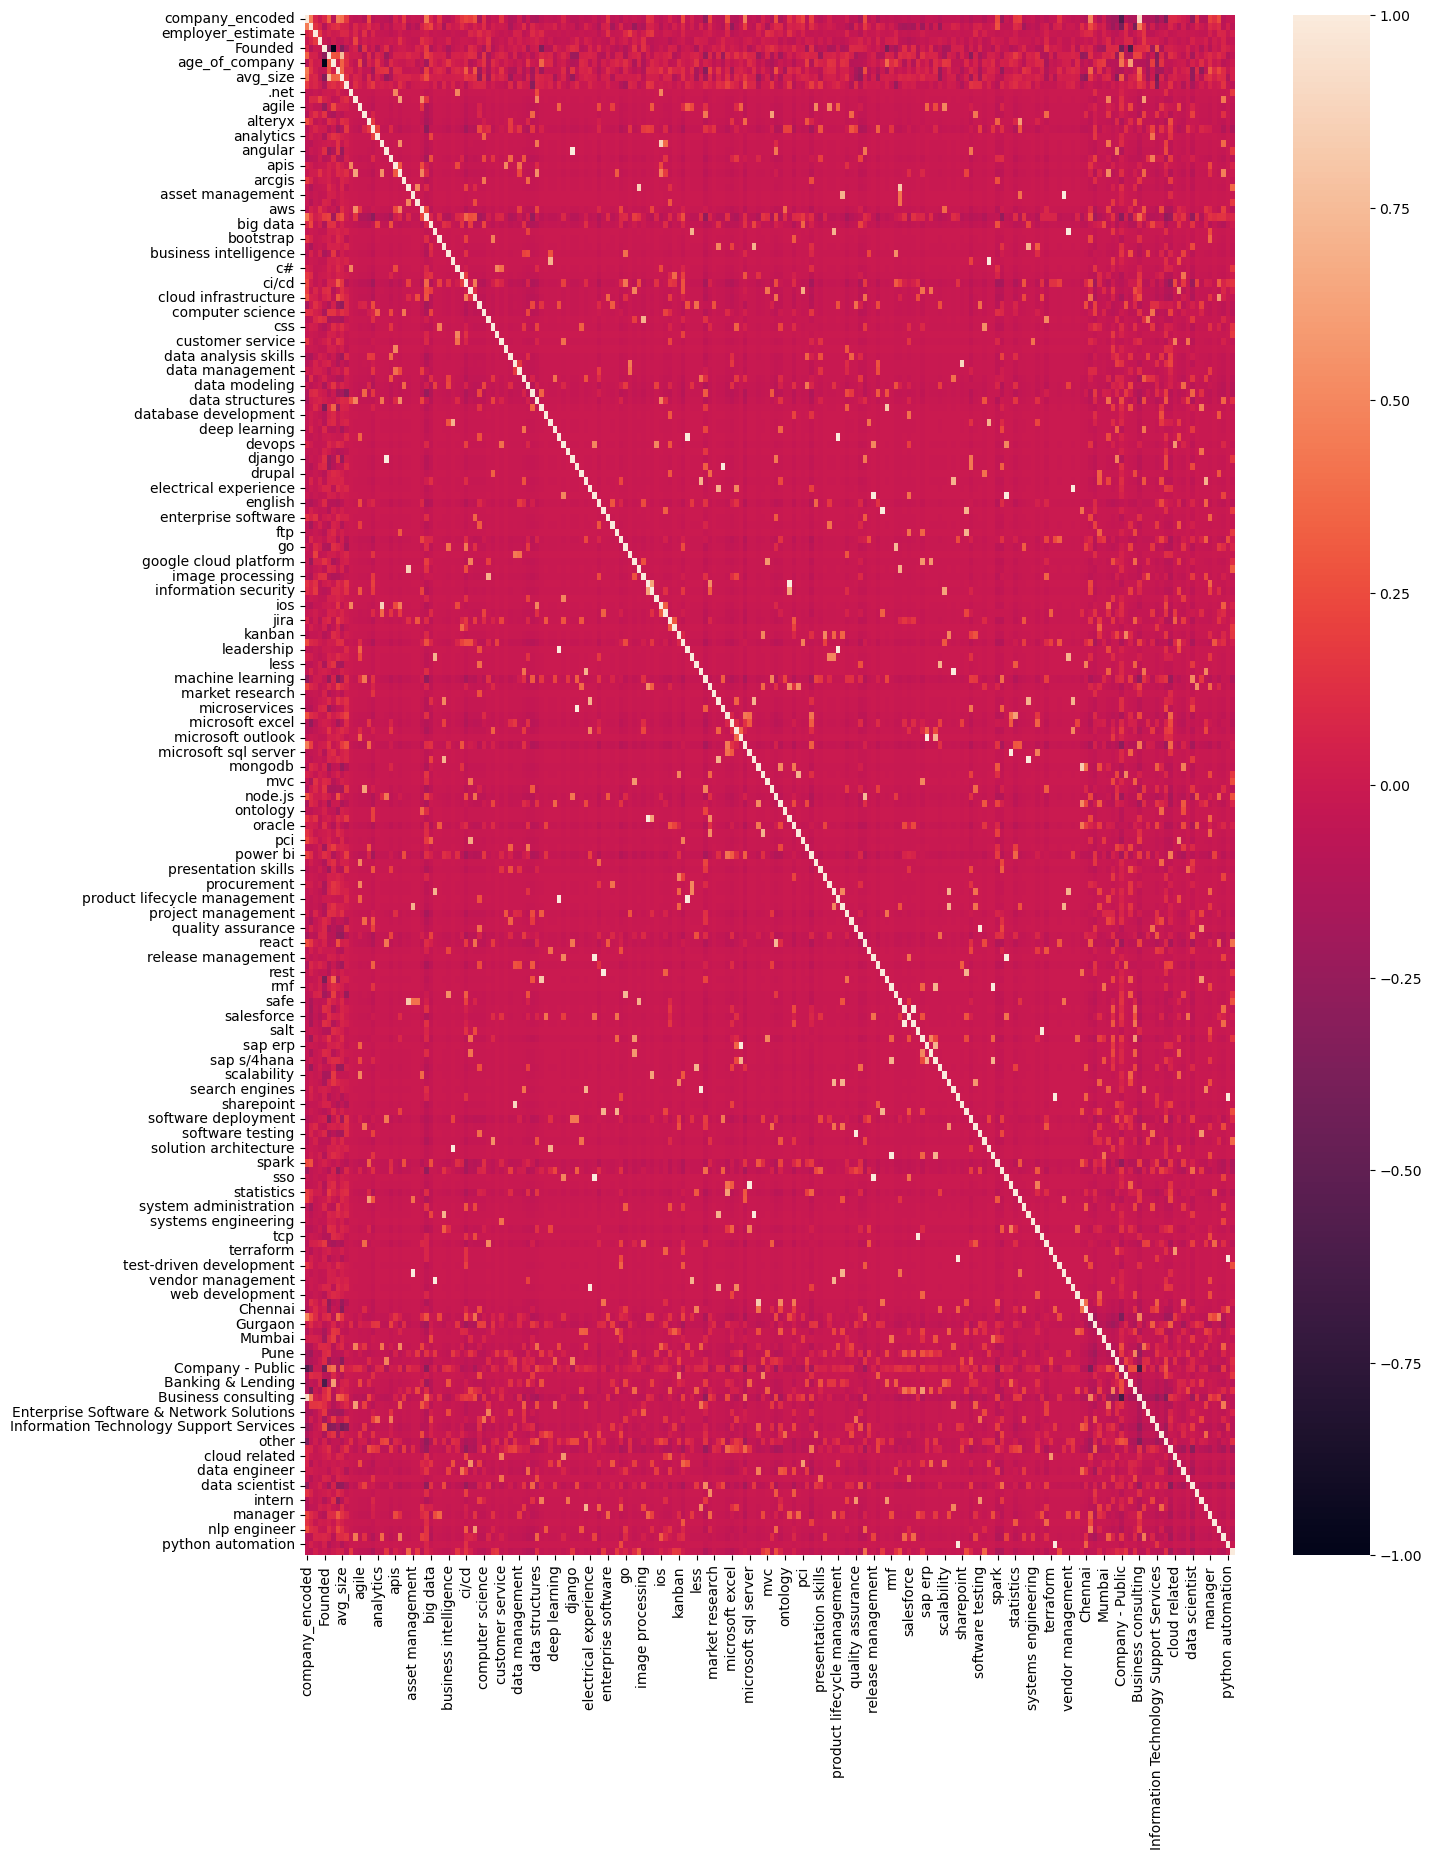

In [243]:
plt.figure(figsize = (15,20))
sns.heatmap(final_df.corr())

### Performing clustering on our data 

In [245]:
from sklearn.cluster import AgglomerativeClustering as ac
obj = ac(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
obj

AgglomerativeClustering(n_clusters=3)

In [247]:
obj.fit_predict(final_df)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

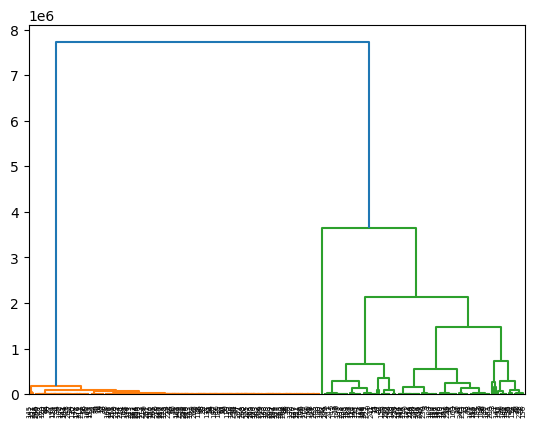

In [249]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(final_df, method = 'ward'))
plt.show()

In [201]:
#final_df.to_csv('new_encoded_df.csv',index = False)

Note that we can think of including JD column in our analysis if modeling results do not improve